In [1]:
from src.algorithm import *
from src.network import *

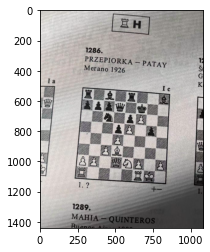

In [2]:
i = 3
image_name = str(i)
img = load_image("examples/{}.jpg".format(image_name))

plt.imshow(img)

In [3]:
edges = get_contours(img)
perspective = get_perspective_from_contours(edges[0])
print(perspective)

contour_ids [1329]
((281.80637, 507.89502), (854.39777, 547.9345), (833.4713, 1147.1927), (228.64827, 1115.4954))


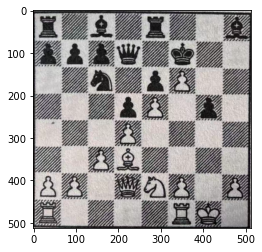

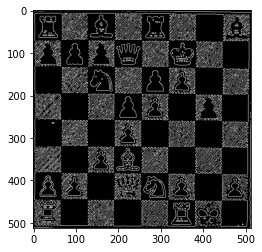

In [4]:
board =get_boards_from_perspective(img, perspective)

In [5]:
model = ConvolutionalNeuralNetwork(1, 13)
model.load_state_dict(torch.load("2_5_2021.pth"))

<All keys matched successfully>

In [6]:
model.eval()

ConvolutionalNeuralNetwork(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=1.0, affine=True, track_running_stats=False)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=1.0, affine=True, track_running_stats=False)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=1.0, affine=True, track_running_stats=False)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(64, 64, 

In [7]:
label2piece = {"0":"b","1":"k","2":"n","3":"p","4":"q","5":"r","6":"B","7":"K","8":"N","9":"P","10":"Q","11":"R","12":"z"}

In [8]:
my_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

In [9]:
def most_frequent(List): 
    return max(set(List), key = List.count) 

In [10]:
fen_list = []
for i in range(8):
    image_list = []
    for j in range(8):
        imgk = PIL.Image.fromarray(board.getTile(i,j).getImage())
        imgk = imgk.convert("L")
        for k in range(4):
            imgk.rotate(90 * k)
            imgk_x = my_transforms(imgk)
            image_list.append(imgk_x)

    image_tensor = torch.stack(image_list, dim=0)

    outputs = model(image_tensor)

    labels = list(torch.argmax(outputs, dim = 1).data.numpy())
    
    avg_labels = [most_frequent(labels[i * 4:(i+1) * 4]) for i in range(8)]
    
    fen_line = []
    for j, label in enumerate(avg_labels):
        piece = label2piece[str(label)]
        if piece == "z":
            if j >= 1 and fen_line[-1].isdigit():
                code = str(int(fen_line[-1]) + 1)
                fen_line[-1] = code
            else:
                fen_line.append("1")
        else:
            fen_line.append(piece)

    fen_line_str = "".join(fen_line)
    fen_list.append(fen_line_str)

In [11]:
fen = "/".join(fen_list)

In [12]:
fen

'r1b1r2b/pppq1k2/2n1pP2/3pK1p1/k2K4/2PB4/PP1QNP1P/R4RK1'

In [13]:
image_list = []